In [1]:
import jsonlines
import random
import rdkit
from rdkit import Chem
from rdkit.Chem import rdChemReactions as rxn

In [2]:
import pandas as pd

In [3]:
def get_rdkit_mol(mol):
    if isinstance(mol, str):
        mol = Chem.MolFromSmiles(mol)
    return mol

In [4]:
def cano_smiles(smiles, remain_isomer=True):
    mol = Chem.MolFromSmiles(smiles)
    if not mol:
        return None
    return Chem.MolToSmiles(mol, isomericSmiles=remain_isomer)

In [5]:
import pickle

In [ ]:
df_test = pd.read_csv('./Models/Transformer/data/10_Sep/raw/test.csv')

In [7]:
rcts_list = [cano_smiles(rxn.split('>')[0]) for rxn in df_test['rxn_smiles'].values]

# Evaluation

In [8]:
from tqdm import tqdm
from collections import defaultdict
import numpy as np

In [ ]:
output_file = './Models/Transformer/results/202504/predictions_raw_test.pickle'

In [27]:
def pickle2kv(_args):
    prediction_row = _args
    total_paths=[]
    for node in prediction_row:
        path = node.get_path()
        total_paths.append(path)

    if total_paths:
        k = total_paths[0][0].plain_smiles
        v = [path[-1].plain_smiles for path in total_paths]
    else: k, v = None, None
    return k, v

In [28]:
predictions = {}
with open(output_file, 'rb') as file:
    prediction_reader = pickle.load(file)
    for prediction_row in prediction_reader:
        result = pickle2kv(prediction_row)
        k, v = result
        predictions[k] = v

In [29]:
len(predictions)

1351

In [ ]:
df_test = pd.read_csv('./Models/Transformer/data/10_Sep/raw/test.csv')

In [31]:
rcts_list = [rxn.split('>')[0] for rxn in df_test['rxn_smiles'].values]

In [32]:
len(set(rcts_list) & predictions.keys())

1351

In [33]:
predictions

{'CC(C)(C)[Si](C)(C)Cl.CCOC(=O)C[C@@H](C)O': ['CCOC(=O)C[C@@H](C)OCEND',
  'CCOC(=O)C[C@@H](C)OCCEND',
  'CCOC(=O)C[C@@H](C)OCCEND',
  'CCOC(=O)C[C@@H](C)OCCOEND',
  'CCOC(=O)C[C@@H](CO)OCEND'],
 'CC1(OC(=O)OCI)CCCCC1.CCn1nc(C2=C(C(=O)O[Na])N3C(=O)[C@H]([C@@H](C)O)[C@H]3C2)cc1C': ['CCn1nc(C2=C(C(=O)O)N3C(=O)[C@H]([C@@H](C)O)[C@H]3C2)cc1CEND',
  'CCn1nc(C2=C(C(=O)O)N3C(=O)[C@H]([C@@H](C)O)[C@H]3C2)ccc1CEND'],
 'CCOC(=O)CCCBr.Cc1c(N(Cc2ccccc2)Cc2ccc(Oc3cccc(O)c3)cc2)cccc1[N+](=O)[O-]': ['Cc1c(N(Cc2ccccc2)Cc2ccc(Oc3cccc([N+](=O)[O-])c4)c3)cc2)cccc1[N+](=O)[O-]END',
  'Cc1c(N(Cc2ccccc2)Cc2ccc(Oc3cccc([N+](=O)[O-])c3)cc2)cccc1[N+](=O)[O-]END',
  'Cc1c([N+](=O)[O-])cccc1Oc1cccc(Oc2cccc([N+](=O)[O-])c2)c1)c1cccc([N+](=O)[O-])c1END',
  'Cc1c([N+](=O)[O-])cc2cccc(Oc3cccc(N(Cc4ccccc4)c4cccc([N+](=O)[O-])c4)c3)c2)cccc1[N+](=O)[O-]END',
  'Cc1c([N+](=O)[O-])cc2cccc(Oc3cccc(Oc4cccc([N+](=O)[O-])c4)c3)c2)cccc1[N+](=O)[O-]END'],
 'FC(F)(F)C1CO1.Nc1cccc(OC(F)(F)F)c1': ['OC(CNc1cccc(OC(F)(F)F)c1)C(F)(F

In [34]:
product

'CC(C)CC(C)(Cc1ccccc1)C(=O)O'

In [35]:
topk_hit_dict = defaultdict(int)
for rxn in df_test['rxn_smiles'].values:
    reactant, rgt, product = rxn.split('>')
    product = cano_smiles(product)
    pred_list = [cano_smiles(smi.replace('END', '')) for smi in predictions.get(reactant, [])]
    
    for k in [1,3,5,10]:
        if product in pred_list[:k]:
            topk_hit_dict[f'Top-{k}'] += 1

In [36]:
topk_hit_dict

defaultdict(int, {'Top-1': 301, 'Top-3': 331, 'Top-5': 344, 'Top-10': 349})

In [37]:
302 / len(df_test)

0.22304283604135894

In [82]:
cnt = 0
for k, v in predictions.items():
    if k in v:
        cnt += 1

In [83]:
len(predictions) - cnt

373

In [ ]:
0.7239082161361954

In [81]:
cnt = 0
for acc in acc_list:
    if  acc.max() > 0:
        cnt += 1
cnt

11

In [84]:
11 / 373

0.029490616621983913

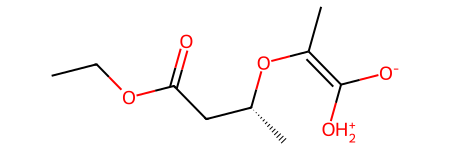

In [65]:
get_rdkit_mol(predictions.get(input_smiles)[1])

68.77037037037037

In [55]:
from rdkit.Chem import AllChem, Draw
def display_rxn(rxn):
    products = rxn.split('>')[-1].split('.')
    reactants = rxn.split('>')[0].split('.')
    print(f'rcts: {reactants}')
    mol_reactants = [get_rdkit_mol(each) for each in reactants]
    display(Draw.MolsToGridImage(mol_reactants, molsPerRow=len(mol_reactants), subImgSize=(400,400)))
    
    print(f'product: {products}')
    mol_products = [get_rdkit_mol(each) for each in products]
    display(Draw.MolsToGridImage(mol_products, molsPerRow=len(mol_products), subImgSize=(400,400)))
    print('='*80)
    print()

rcts: ['CC(C)(C)[Si](C)(C)Cl', 'CCOC(=O)C[C@@H](C)O']


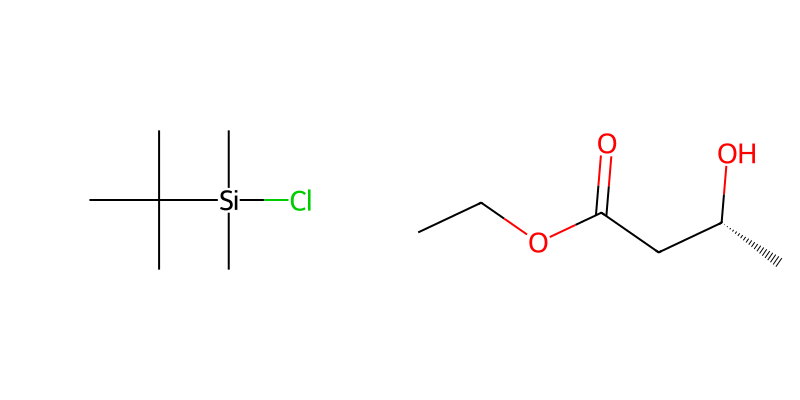

product: ['CCOC(=O)C[C@@H](C)O[Si](C)(C)C(C)(C)C']


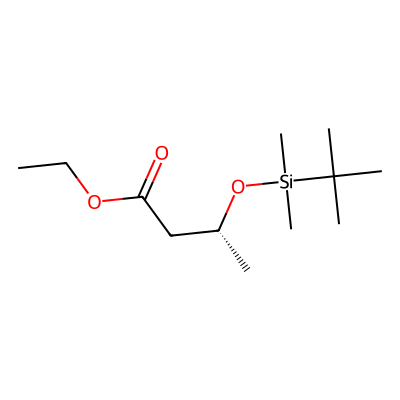

In [56]:
rxn = df_test['rxn_smiles'].values[0]
display_rxn(rxn)

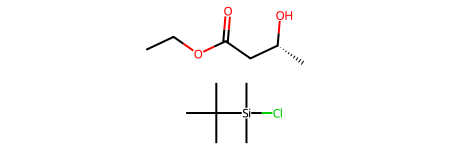

In [49]:
input_smiles = 'C C ( C ) ( C ) [Si] ( C ) ( C ) Cl . C C O C ( = O ) C [C@@H] ( C ) O'
input_smiles = input_smiles.replace(' ', '')
get_rdkit_mol(input_smiles)

In [72]:
output_list = [['C C n 1 n c ( C 2 = C ( C ( = O ) O C N P 2 ) N 3 C ( = O ) C = C 4 C 5 C C C C C 4 ) N 3 C ( = O ) C 3 C 2 ) c c 1 C END', 'C C n 1 n c ( C 2 = C ( C ( = O ) O C N P 2 ) N 3 C ( = O ) C = C 1 C 2 ) C C C C C 1 END', 'C C n 1 n c ( C 2 = C ( C ( = O ) O C N 2 ) N 3 C ( = O ) C = C ( [O-] ) C C C C C 1', 'C C n 1 n c ( C 2 = C ( C ( = O ) O C N P 2 ) N 3 C ( = O ) C = C 4 C 5 C C C C C 4 ) N 3 C ( = O ) C 1 C 2 ) C C C C C 1 END', 'C C n 1 n c ( C 2 = C ( C ( = O ) O C N P 2 ) N 3 C ( = O ) C = C 4 C 5 C C C C C 4 ) N 3 C ( = O ) C 2 = C ( C ) C C C C C 2 ) C C C C C 1 END', 'C C n 1 n c ( C 2 = C ( C ( = O ) O C N P 2 ) N 3 C ( = O ) C = C ( [O-] ) C 4 = C ( C ) C C C C C 4 ) N 3 C ( = O ) C 3 C 2 ) c c 1 C', 'C C n 1 n c ( C 2 = C ( C ( = O ) O C N 2 ) N 3 C ( = O ) C 3 = C ( C 4 = C ( C ( = O ) O C O C ( = O ) O C C ) C C C C C 1 END', 'C C n 1 n c ( C 2 = C ( C ( = O ) O C N 2 ) N 3 C ( = O ) C = C ( [O-] ) C 4 = C ( C ) C C C C C 4 ) N 3 C ( = O ) C C N 2 C 3 ) c c 1 C', 'C C n 1 n c ( C 2 = C ( C ( = O ) O C N 2 ) N 3 C ( = O ) C = C 4 C ( = O ) O C [NH+] 4 C ( = O ) O C 4 ( C ) C ) C C C C C 4 ) C 3 ) C C C C C 1', 'C C n 1 n c ( C 2 = C ( C ( = O ) O C N P 2 ) N 3 C ( = O ) C = C 4 C 5 C C C C C 4 ) N 3 C ( = O ) C 2 = C ( C ) C C C C C 1 END', 'C C n 1 n c ( C 2 = C ( C ( = O ) O C N P 2 ) N 3 C ( = O ) C = C 4 C 5 C C C C C 4 ) N 3 C ( = O ) C 3 = C ( C ) C C [NH+] ( C ) C ) C C C C C 1', 'C C n 1 n c ( C 2 = C ( C ( = O ) O C N P 2 ) N 3 C ( = O ) C = C ( [O-] ) C 4 = C ( C ) C C C C C 4 ) N 3 C ( = O ) C C N ( C ) O ) C C 3 C 2 ) c c 1 C', 'C C n 1 n c ( C 2 = C ( C ( = O ) O C N P 2 ) N 3 C ( = O ) C = C 4 C 5 C C C C C 4 ) N 3 C ( = O ) C 2 C C [NH+] ( C ( = O ) O C C 2 ( C ) C ) C C C C C 1', 'C C n 1 n c ( C 2 = C ( C ( = O ) O C N 2 ) N 3 C ( = O ) C = C 4 C ( = O ) O C [NH+] 4 C ( = O ) O C 4 ( C ) C ) C C C C C 4 ) C C C C C 1', 'C C n 1 n c ( C 2 = C ( C ( = O ) O C N P 2 ) N 3 C ( = O ) C = C 4 C 5 C C C C C 4 ) N 3 C ( = O ) C 2 = C ( C ) C C C C C 2 ) c c 1 C END', 'C C n 1 n c ( C 2 = C ( C ( = O ) O C N P 2 ) N 3 C ( = O ) C = C 4 C 5 C C C C C 4 ) N 3 C ( = O ) C 2 C C [NH+] ( C ( = O ) O C C 2 ( C ) O ) C C C C C 1', 'C C n 1 n c ( C 2 = C ( C ( = O ) O C N P 2 ) N 3 C ( = O ) C = C 4 C 5 C C C C C 4 ) N 3 C ( = O ) C 2 C C [NH+] ( C ( = O ) O C C 2 ( C ) [O-] ) C C C C C 1', 'C C n 1 n c ( C 2 = C ( C ( = O ) O C N P 2 ) N 3 C ( = O ) C = C ( [O-] ) C 4 = C ( C ) C C C C C 4 ) N 3 C ( = O ) C C N ( C ) O ) C C 2 C 3 ) c c 1 C', 'C C n 1 n c ( C 2 = C ( C ( = O ) O C N P 2 ) N 3 C ( = O ) C = C ( [O-] ) C 4 = C ( C ) C C C C C 4 ) N 3 C ( = O ) C C N ( C ) O ) C C 2 C C 3 ) c c 1 C', 'C C n 1 n c ( C 2 = C ( C ( = O ) O C N P 2 ) N 3 C ( = O ) C = C 4 C 5 C C C C C 4 ) N 3 C ( = O ) C 2 C C [NH+] ( C ( = O ) O C C 2 ( C ) C ) C C C C C 2']]
output_list = output_list[0]
output_list = [smi.replace(' ', '').replace('END', '') for smi in output_list]
output_list

['CCn1nc(C2=C(C(=O)OCNP2)N3C(=O)C=C4C5CCCCC4)N3C(=O)C3C2)cc1C',
 'CCn1nc(C2=C(C(=O)OCNP2)N3C(=O)C=C1C2)CCCCC1',
 'CCn1nc(C2=C(C(=O)OCN2)N3C(=O)C=C([O-])CCCCC1',
 'CCn1nc(C2=C(C(=O)OCNP2)N3C(=O)C=C4C5CCCCC4)N3C(=O)C1C2)CCCCC1',
 'CCn1nc(C2=C(C(=O)OCNP2)N3C(=O)C=C4C5CCCCC4)N3C(=O)C2=C(C)CCCCC2)CCCCC1',
 'CCn1nc(C2=C(C(=O)OCNP2)N3C(=O)C=C([O-])C4=C(C)CCCCC4)N3C(=O)C3C2)cc1C',
 'CCn1nc(C2=C(C(=O)OCN2)N3C(=O)C3=C(C4=C(C(=O)OCOC(=O)OCC)CCCCC1',
 'CCn1nc(C2=C(C(=O)OCN2)N3C(=O)C=C([O-])C4=C(C)CCCCC4)N3C(=O)CCN2C3)cc1C',
 'CCn1nc(C2=C(C(=O)OCN2)N3C(=O)C=C4C(=O)OC[NH+]4C(=O)OC4(C)C)CCCCC4)C3)CCCCC1',
 'CCn1nc(C2=C(C(=O)OCNP2)N3C(=O)C=C4C5CCCCC4)N3C(=O)C2=C(C)CCCCC1',
 'CCn1nc(C2=C(C(=O)OCNP2)N3C(=O)C=C4C5CCCCC4)N3C(=O)C3=C(C)CC[NH+](C)C)CCCCC1',
 'CCn1nc(C2=C(C(=O)OCNP2)N3C(=O)C=C([O-])C4=C(C)CCCCC4)N3C(=O)CCN(C)O)CC3C2)cc1C',
 'CCn1nc(C2=C(C(=O)OCNP2)N3C(=O)C=C4C5CCCCC4)N3C(=O)C2CC[NH+](C(=O)OCC2(C)C)CCCCC1',
 'CCn1nc(C2=C(C(=O)OCN2)N3C(=O)C=C4C(=O)OC[NH+]4C(=O)OC4(C)C)CCCCC4)CCCCC1',
 'CCn1nc(